Images infectées : 13780
Images non infectées : 13780


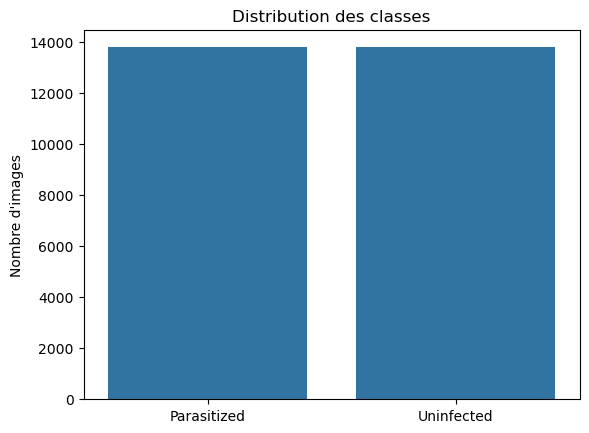

In [1]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Chemins
from  pathlib import Path 
path = Path(r"C:\Users\congo\Desktop\cell_images")
data_dir = path
parasitized_dir = os.path.join(data_dir, "Parasitized")
uninfected_dir = os.path.join(data_dir, "Uninfected")

# Nombre d'images par classe
num_parasitized = len(os.listdir(parasitized_dir))
num_uninfected = len(os.listdir(uninfected_dir))

print(f"Images infectées : {num_parasitized}")
print(f"Images non infectées : {num_uninfected}")

# Distribution des classes
sns.barplot(x=["Parasitized", "Uninfected"], y=[num_parasitized, num_uninfected])
plt.title("Distribution des classes")
plt.ylabel("Nombre d'images")
plt.show()


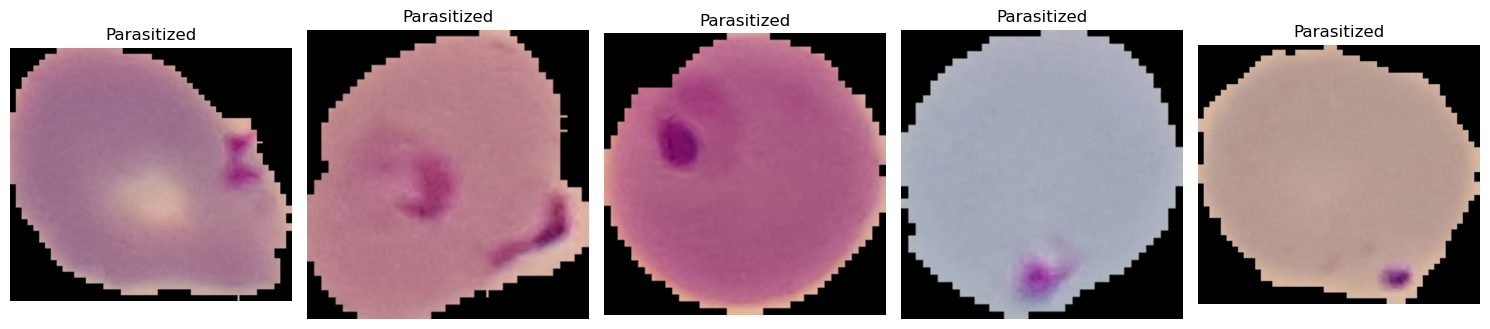

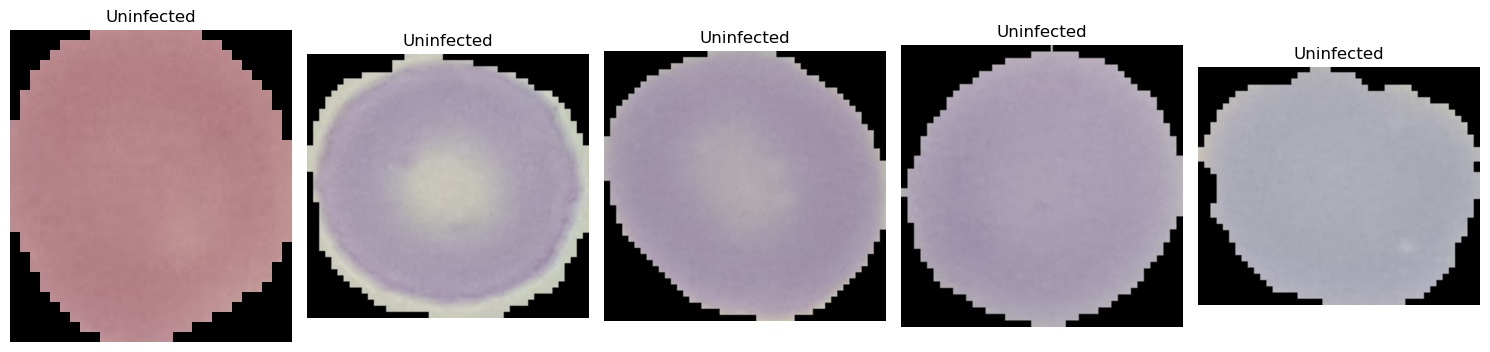

In [2]:
def show_images_from(folder, label, num=5):
    images = random.sample(os.listdir(folder), num)
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_images_from(parasitized_dir, "Parasitized")
show_images_from(uninfected_dir, "Uninfected")


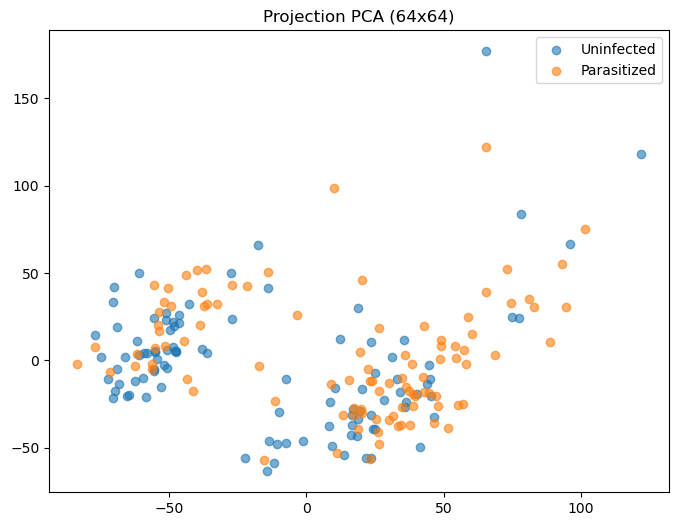

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def extract_flattened_images(folder, label, num=100):
    images = []
    labels = []
    for img_name in random.sample(os.listdir(folder), num):
        img_path = os.path.join(folder, img_name)
        with Image.open(img_path).resize((64, 64)) as img:
            images.append(np.array(img).flatten())
            labels.append(label)
    return images, labels

img_p, lbl_p = extract_flattened_images(parasitized_dir, 1)
img_u, lbl_u = extract_flattened_images(uninfected_dir, 0)

X = np.array(img_p + img_u)
y = np.array(lbl_p + lbl_u)

# Normaliser
X = StandardScaler().fit_transform(X)

# Réduction avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label="Uninfected", alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label="Parasitized", alpha=0.6)
plt.title("Projection PCA (64x64)")
plt.legend()
plt.show()


In [8]:
import tensorflow as tf
import os
import random

(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()
label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# On choisit les classes 0 à 5 comme négatifs
target_folder = r'C:\Users\congo\Desktop\data\non_frottis'


os.makedirs(target_folder, exist_ok=True)

idx = [i for i, y in enumerate(y_train) if y[0] in range(6)]
choix = random.sample(idx, 1000)
for i, j in enumerate(choix):
    img = x_train[j]
    fname = os.path.join(target_folder, f"img_{i}.png")
    tf.keras.preprocessing.image.save_img(fname, img)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 131s 1us/step


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\congo\Desktop\data/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r'C:\Users\congo\Desktop\data/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 22847 images belonging to 2 classes.
Found 5711 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binaire : frottis vs non-frottis
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\congo\anaconda3\envs\my_tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


C:\Users\congo\anaconda3\envs\my_tensorflow_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 880s 1s/step - accuracy: 0.9882 - loss: 0.0389 - val_accuracy: 1.0000 - val_loss: 2.3169e-05
Epoch 2/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 579s 811ms/step - accuracy: 1.0000 - loss: 1.7288e-05 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 3/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 552s 772ms/step - accuracy: 1.0000 - loss: 3.1266e-06 - val_accuracy: 1.0000 - val_loss: 1.6946e-06
Epoch 4/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 552s 773ms/step - accuracy: 1.0000 - loss: 3.3776e-07 - val_accuracy: 1.0000 - val_loss: 1.0531e-06
Epoch 5/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 488s 683ms/step - accuracy: 1.0000 - loss: 2.5334e-07 - val_accuracy: 1.0000 - val_loss: 6.5276e-07
Epoch 6/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 476s 667ms/step - accuracy: 1.0000 - loss: 1.8042e-07 - val_accuracy: 1.0000 - val_loss: 4.2089e-07
Epoch 7/10
714/714 ━━━━━━━━━━━━━━━━━━━━ 476s 667ms/step - accuracy: 1.0000 - loss: 9.7525e-08 - val_accuracy: 1.0000 - val_loss: 2.6538e-07
Epoch 8/10
714/714 ━━━━━━━━━━━━

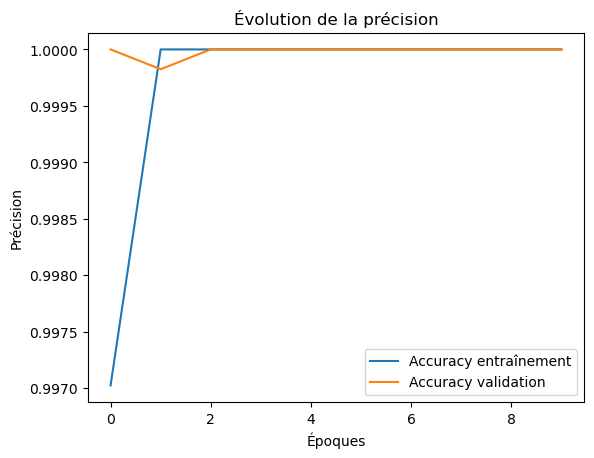

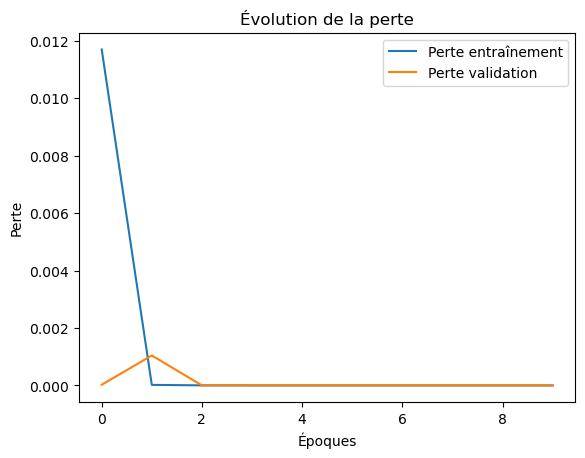

In [12]:
import matplotlib.pyplot as plt

# Affichage de la courbe de précision
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title("Évolution de la précision")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()
plt.show()

# Affichage de la courbe de perte
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title("Évolution de la perte")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()
plt.show()


In [13]:
model.save("classificateur_frottis.keras")


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'ff1127712030f7e7c994e9b0dd662942.jpg'  # ← Change ça avec ton image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("❌ Ce n'est PAS un frottis sanguin.")
else:
    print("✅ C'est un frottis sanguin.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
❌ Ce n'est PAS un frottis sanguin.
